In [ ]:
!pip uninstall torch torchvision

In [1]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

In [2]:
from src.helper_functions import plot_random_image_and_label

# Creating a Custom Dataset For Your Files:

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__

In [3]:
class WasteClassificationDataset(Dataset):

    def __init__(self, root_dir, transform=None):
        '''
            This initializes the dataset
            Args:
                root_dir (str): Directly with subfolders
                transform (callable): For transforming images like Augmentation

            We pass in data/train or data/test
        '''

        self.root_dir = root_dir # To know where to find images
        self.transform = transform

        self.classes = []
        all_items = os.listdir(root_dir) # in our case, its paper, metal, glass, plastic.
        
        # getting all directories in /train for
        for item in all_items:
            item_path = os.path.join(root_dir, item)

            if os.path.isdir(item_path):
                self.classes.append(item)

        self.classes = sorted(self.classes) #folder names as classes

        self.class_to_idx = {}
        for idx, class_name in enumerate(self.classes):
            self.class_to_idx[class_name] = idx
        # e.g. {'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3} -- Alphabetically

        self.samples = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            class_idx = self.class_to_idx[class_name]

            all_files = os.listdir(class_dir)
            for img_name in all_files:
                if img_name.endswith(".jpg"):
                    img_path = os.path.join(class_dir, img_name)
                    self.samples.append((img_path, class_idx))

    def __len__(self):
        '''
            return number of samples in the dataset
        '''
        return len(self.samples)

    def __getitem__(self, idx):
        '''
            Return one sample at given index
        '''
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("RGB")
        # the above opens image file and converts to RGB

        if self.transform:
            image = self.transform(image)
            #we transform here so we can apply different transformations
        
        return image, label

In [4]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
train_dataset = WasteClassificationDataset("./data/train", transform=train_transforms)
test_dataset = WasteClassificationDataset("./data/test", transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



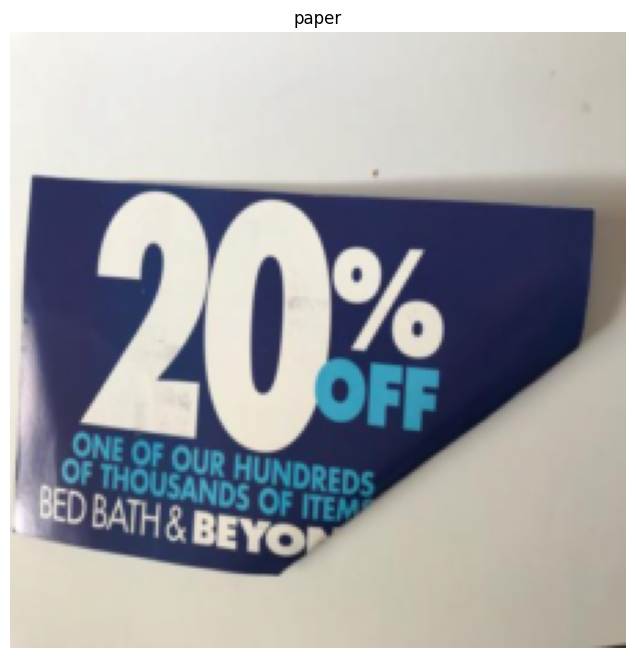

Index: 839
Label (integer): 2
Class name: paper
Image tensor shape: (224, 224, 3)
Image value range: [0.020, 0.996]


In [8]:
plot_random_image_and_label(train_dataset, train_dataset.classes)